In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler

## Load the Dataset

In [27]:
# Load the dataset
df = pd.read_csv('kaggle_diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


## Prepare Features and Target

In [28]:
# Features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']
print('Features shape:', X.shape)
print('Target shape:', y.shape)

Features shape: (2000, 8)
Target shape: (2000,)


## Split the Data

In [29]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train set shape:', X_train.shape)
print('Test set shape:', X_test.shape)

Train set shape: (1600, 8)
Test set shape: (400, 8)


## Create and Train KNN Model

In [30]:
# Create KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)
print('Model trained successfully')

Model trained successfully


## Make Predictions

In [31]:
# Make predictions
y_pred = knn.predict(X_test)
print('Predictions made')

Predictions made


## Evaluate the Model

In [32]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       253
           1       0.73      0.69      0.71       147

    accuracy                           0.79       400
   macro avg       0.78      0.77      0.77       400
weighted avg       0.79      0.79      0.79       400



## Convolutional Neural Network (CNN) Model

In [34]:
# Scale the features for CNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape for CNN (add channel dimension)
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

print('CNN input shapes:')
print('Train:', X_train_cnn.shape)
print('Test:', X_test_cnn.shape)

CNN input shapes:
Train: (1600, 8, 1)
Test: (400, 8, 1)


In [35]:
# Create CNN model
model = keras.Sequential([
    layers.Conv1D(32, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(64, kernel_size=2, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

C:\Users\Shuvo\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 7, 32)          │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 3, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 2, 64)          │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,481 (33.13 KB)

 Trainable params: 8,481 (33.13 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
# Train the CNN model
history = model.fit(X_train_cnn, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_split=0.2,
                    verbose=1)

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.6766 - loss: 0.6297 - val_accuracy: 0.7031 - val_loss: 0.6183
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7242 - loss: 0.5616 - val_accuracy: 0.7125 - val_loss: 0.5975
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7414 - loss: 0.5393 - val_accuracy: 0.7156 - val_loss: 0.5831
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7406 - loss: 0.5310 - val_accuracy: 0.7094 - val_loss: 0.5820
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7484 - loss: 0.5174 - val_accuracy: 0.7094 - val_loss: 0.5627
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7500 - loss: 0.5106 - val_accuracy: 0.7188 - val_loss: 0.5535
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7523 - loss: 0.5110 - val_accuracy: 0.7125 - val_loss: 0.5534
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7586 - loss: 0.5072 - val_accuracy: 0.7156 - v

In [37]:
# Make predictions with CNN
y_pred_cnn_proba = model.predict(X_test_cnn)
y_pred_cnn = (y_pred_cnn_proba > 0.5).astype(int).flatten()

# Evaluate CNN model
accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
print(f'CNN Accuracy: {accuracy_cnn:.2f}')
print('CNN Classification Report:')
print(classification_report(y_test, y_pred_cnn))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
CNN Accuracy: 0.82
CNN Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       253
           1       0.83      0.65      0.73       147

    accuracy                           0.82       400
   macro avg       0.83      0.79      0.80       400
weighted avg       0.83      0.82      0.82       400



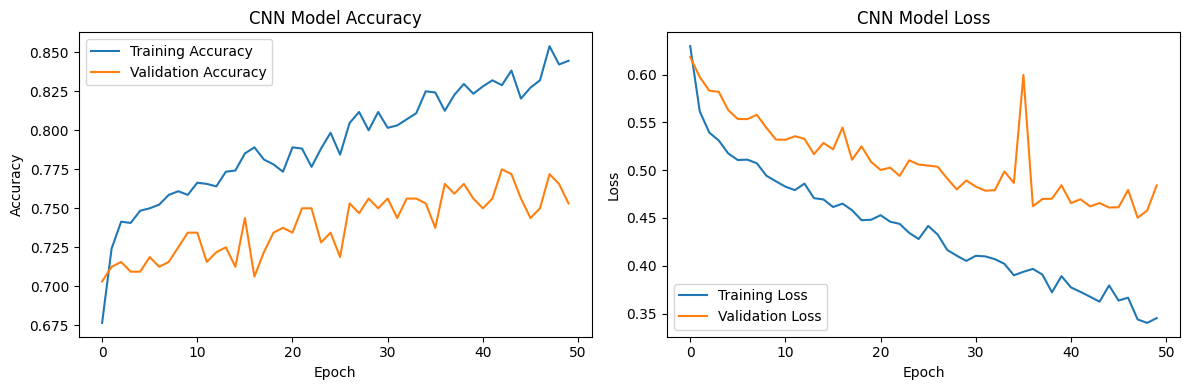

In [38]:
# CNN Training History
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

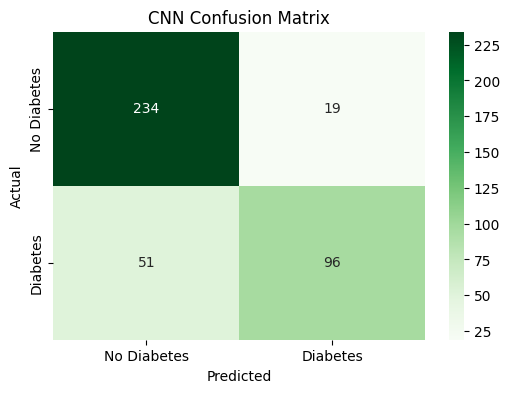

In [39]:
# CNN Confusion Matrix
cm_cnn = confusion_matrix(y_test, y_pred_cnn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['No Diabetes', 'Diabetes'], 
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('CNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Artificial Neural Network (ANN) with Attention

In [43]:
# Custom Attention Layer
class AttentionLayer(layers.Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name='attention_weight', shape=(input_shape[-1], 1),
                                initializer='random_normal', trainable=True)
        self.b = self.add_weight(name='attention_bias', shape=(input_shape[1], 1),
                                initializer='zeros', trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        # Compute attention scores
        e = tf.nn.tanh(tf.matmul(x, self.W) + self.b)
        a = tf.nn.softmax(e, axis=1)
        # Apply attention weights
        output = x * a
        return tf.reduce_sum(output, axis=1)

# Create ANN with Attention model
ann_model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Reshape((32, 1)),  # Reshape for attention
    AttentionLayer(),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

ann_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

ann_model.summary()

C:\Users\Shuvo\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 32, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_layer                 │ (None, 1)              │            33 │
│ (AttentionLayer)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,570 (45.20 KB)

 Trainable params: 11,570 (45.20 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# Train the ANN model
ann_history = ann_model.fit(X_train_scaled, y_train,
                            epochs=100,
                            batch_size=32,
                            validation_split=0.2,
                            verbose=1)

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.6641 - loss: 0.6732 - val_accuracy: 0.6656 - val_loss: 0.6386
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6641 - loss: 0.5600 - val_accuracy: 0.6656 - val_loss: 0.5610
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6641 - loss: 0.5025 - val_accuracy: 0.6656 - val_loss: 0.5434
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6641 - loss: 0.4887 - val_accuracy: 0.6656 - val_loss: 0.5414
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7703 - loss: 0.4805 - val_accuracy: 0.7344 - val_loss: 0.5408
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7844 - loss: 0.4798 - val_accuracy: 0.7375 - val_loss: 0.5323
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7859 - loss: 0.4711 - val_accuracy: 0.7531 - val_loss: 0.5273
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7922 - loss: 0.4705 - val_accuracy: 0.7625 - 

In [46]:
# Make predictions with ANN
y_pred_ann_proba = ann_model.predict(X_test_scaled)
y_pred_ann = (y_pred_ann_proba > 0.5).astype(int).flatten()

# Evaluate ANN model
accuracy_ann = accuracy_score(y_test, y_pred_ann)
print(f'ANN Accuracy: {accuracy_ann:.2f}')
print('ANN Classification Report:')
print(classification_report(y_test, y_pred_ann))

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
ANN Accuracy: 0.86
ANN Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       253
           1       0.82      0.81      0.81       147

    accuracy                           0.86       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.86      0.86      0.86       400



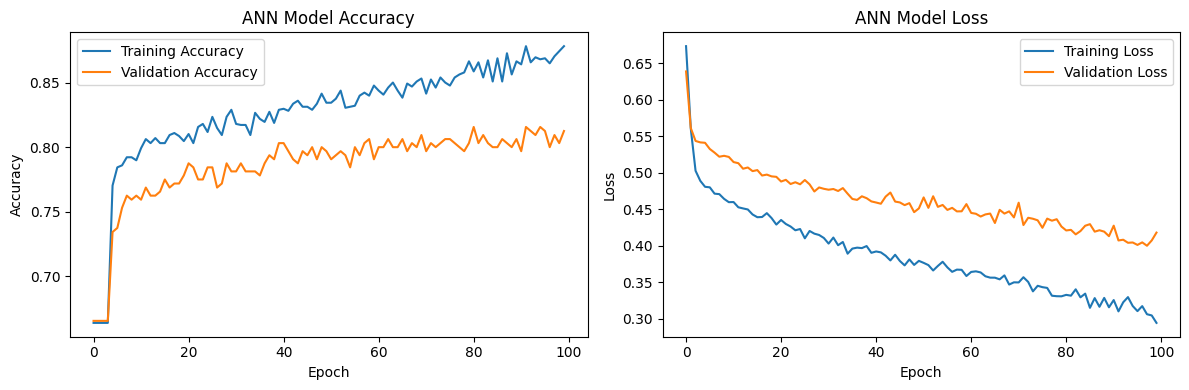

In [47]:
# ANN Training History
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(ann_history.history['accuracy'], label='Training Accuracy')
plt.plot(ann_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('ANN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(ann_history.history['loss'], label='Training Loss')
plt.plot(ann_history.history['val_loss'], label='Validation Loss')
plt.title('ANN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

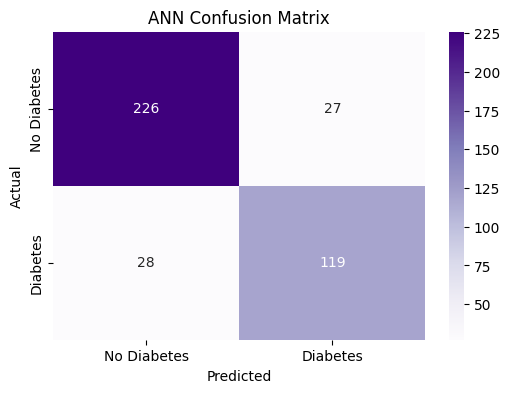

In [49]:
# ANN Confusion Matrix
cm_ann = confusion_matrix(y_test, y_pred_ann)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ann, annot=True, fmt='d', cmap='Purples',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('ANN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Model Comparison

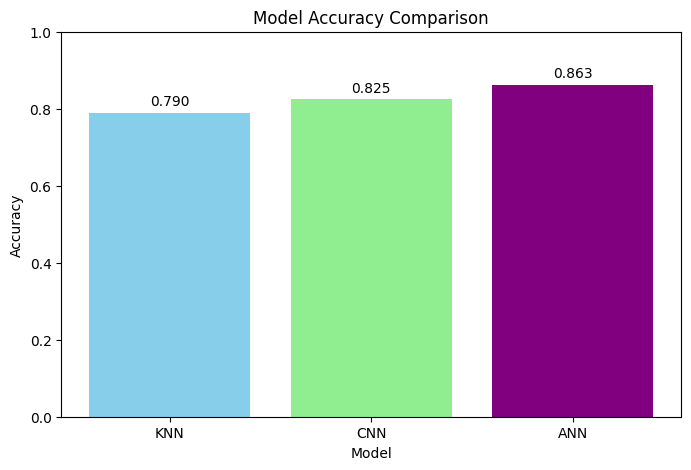

Model Performance Summary:
KNN Accuracy: 0.790
CNN Accuracy: 0.825
ANN Accuracy: 0.863

Best Model: ANN


In [ ]:
# Model Comparison
models = ['KNN', 'CNN', 'ANN', 'LSTM']
accuracies = [accuracy, accuracy_cnn, accuracy_ann, accuracy_lstm]

plt.figure(figsize=(10, 5))
bars = plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'purple', 'orange'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# Add accuracy values on bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{acc:.3f}', ha='center', va='bottom')

plt.show()

# Print summary
print("Model Performance Summary:")
print(f"KNN Accuracy: {accuracy:.3f}")
print(f"CNN Accuracy: {accuracy_cnn:.3f}")
print(f"ANN Accuracy: {accuracy_ann:.3f}")
print(f"LSTM Accuracy: {accuracy_lstm:.3f}")
print(f"\nBest Model: {models[accuracies.index(max(accuracies))]}")

## Long Short-Term Memory (LSTM) Model

In [56]:
# Prepare data for LSTM (treat features as sequence)
# Reshape to (samples, timesteps, features)
X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

print('LSTM input shapes:')
print('Train:', X_train_lstm.shape)
print('Test:', X_test_lstm.shape)

LSTM input shapes:
Train: (1600, 8, 1)
Test: (400, 8, 1)


In [ ]:
# Create LSTM model
lstm_model = keras.Sequential([
    layers.LSTM(64, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), return_sequences=True),
    layers.Dropout(0.3),
    layers.LSTM(32, return_sequences=False),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

lstm_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

lstm_model.summary()

In [ ]:
# Train the LSTM model
lstm_history = lstm_model.fit(X_train_lstm, y_train,
                              epochs=100,
                              batch_size=32,
                              validation_split=0.2,
                              verbose=1)

In [ ]:
# Make predictions with LSTM
y_pred_lstm_proba = lstm_model.predict(X_test_lstm)
y_pred_lstm = (y_pred_lstm_proba > 0.5).astype(int).flatten()

# Evaluate LSTM model
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
print(f'LSTM Accuracy: {accuracy_lstm:.2f}')
print('LSTM Classification Report:')
print(classification_report(y_test, y_pred_lstm))

In [ ]:
# LSTM Training History
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['accuracy'], label='Training Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['loss'], label='Training Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# LSTM Confusion Matrix
cm_lstm = confusion_matrix(y_test, y_pred_lstm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('LSTM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Data Visualization

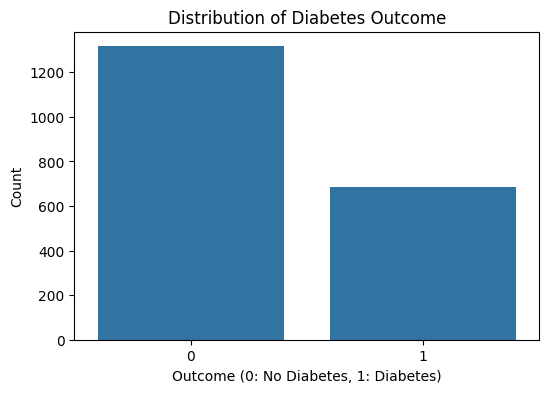

In [52]:
# Class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Count')
plt.show()

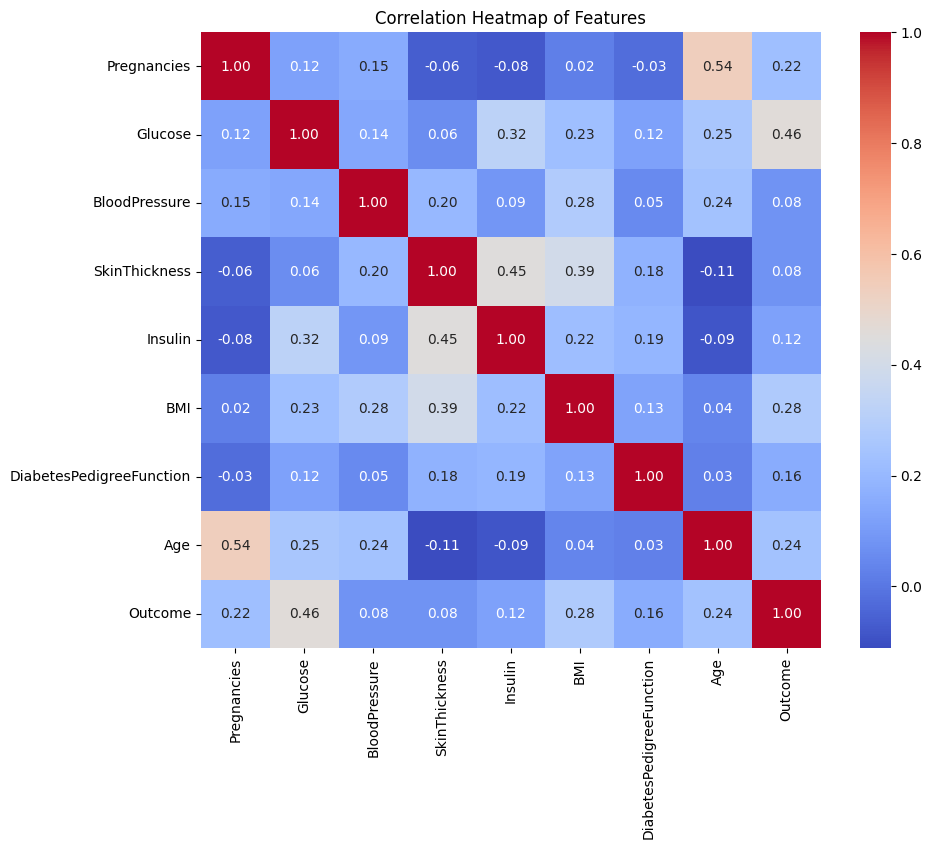

In [53]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

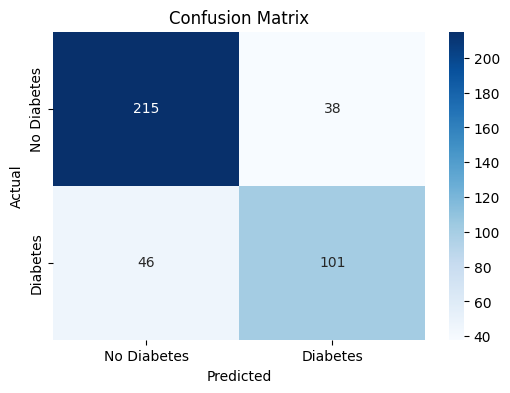

In [54]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Diabetes', 'Diabetes'], 
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

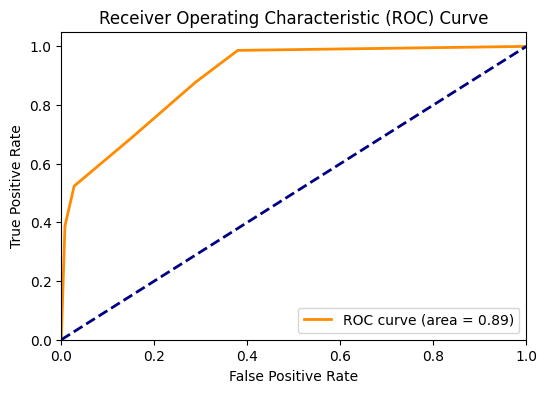

In [55]:
# ROC Curve
y_pred_proba = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

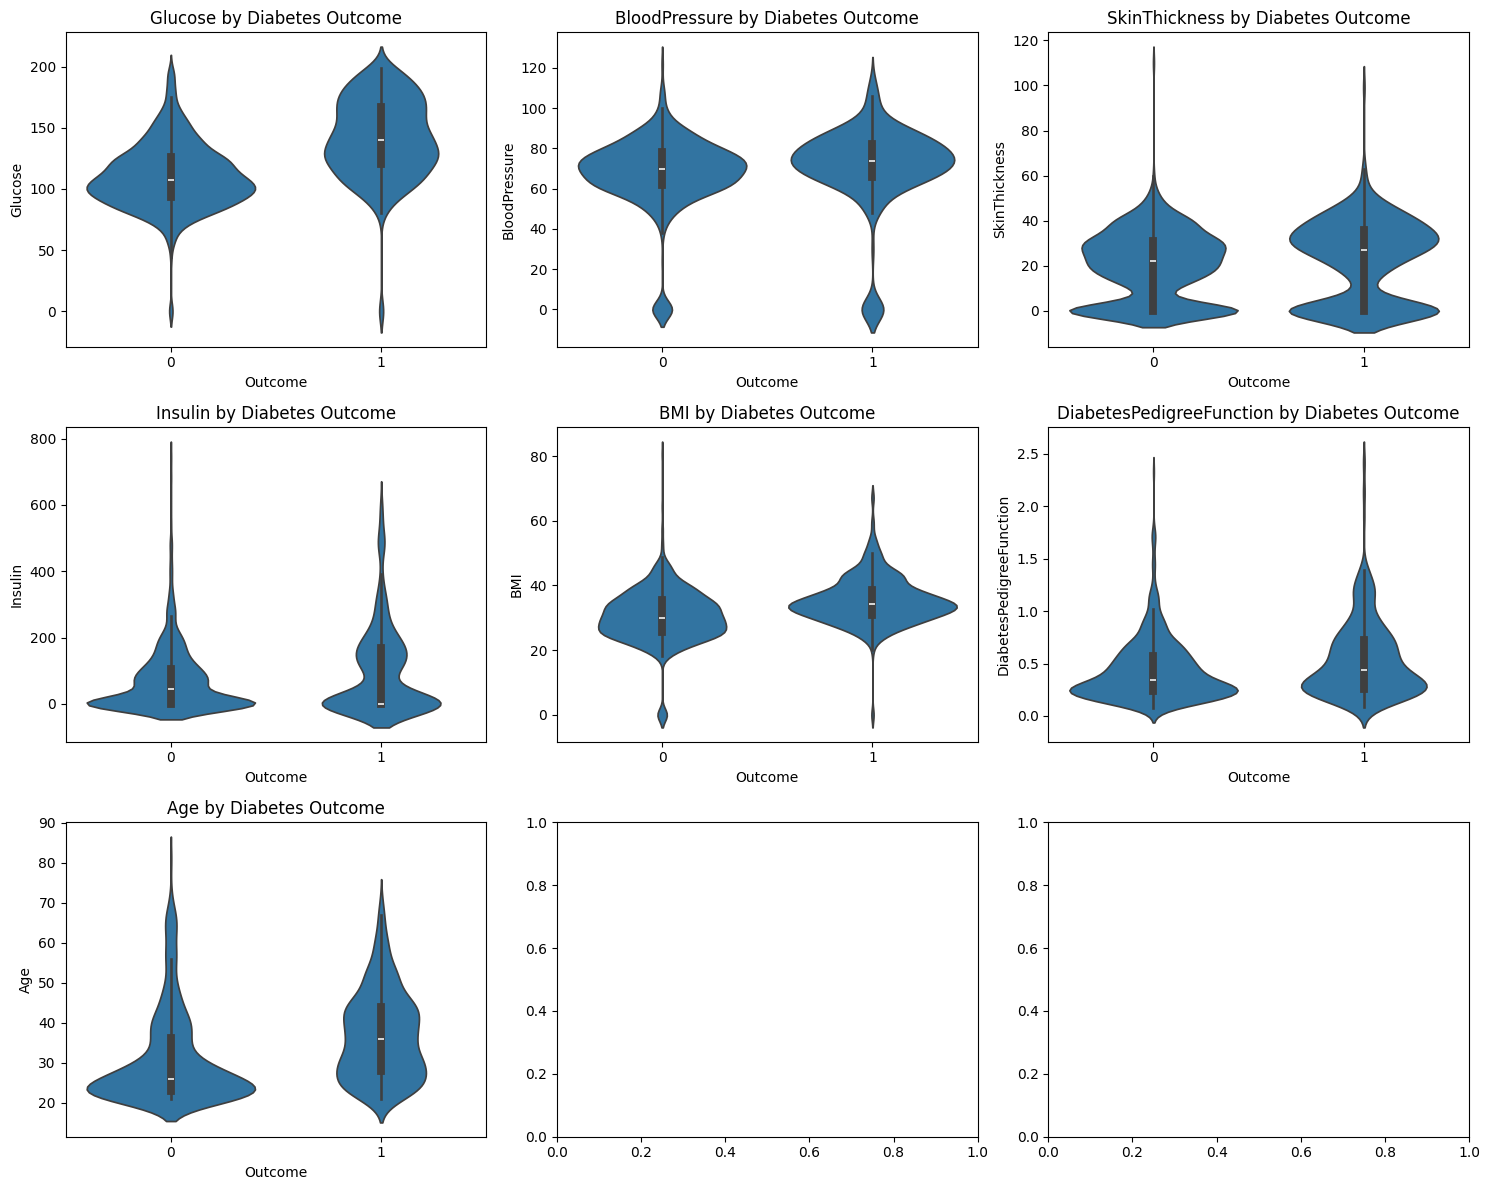

In [25]:
# Feature distributions by outcome (Violin Plots)
features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i, feature in enumerate(features):
    if i < len(axes):
        sns.violinplot(x='Outcome', y=feature, data=df, ax=axes[i], inner='box')
        axes[i].set_title(f'{feature} by Diabetes Outcome')

plt.tight_layout()
plt.show()